In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

%matplotlib inline

In [6]:
with open("data/clustering.pkl", "rb") as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering["X"])
y = np.array(data_clustering["Y"])

In [7]:
dbscan = DBSCAN(eps=0.6, min_samples=10).fit(X)

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

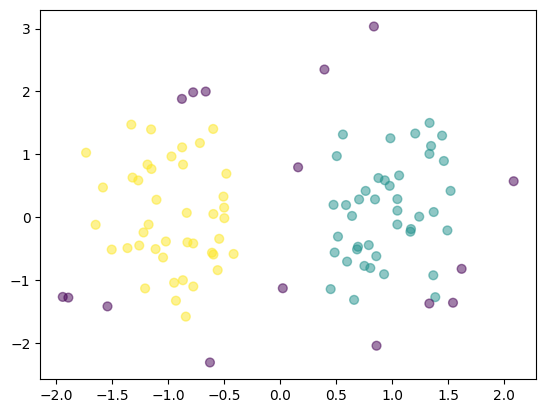

In [8]:
labels = dbscan.labels_

plt.scatter(X[:,0], X[:,1], s=40, c=labels, alpha=0.5)
plt.show()

In [13]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2).fit(X)

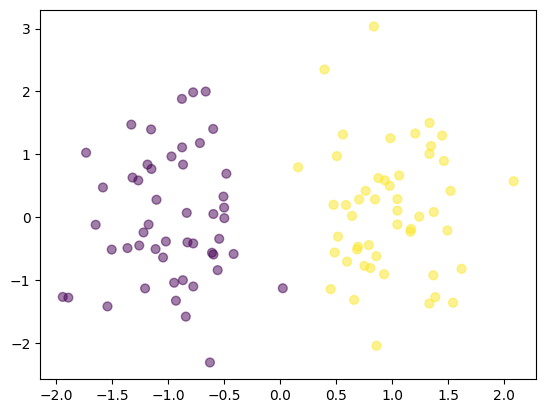

In [14]:
plt.scatter(X[:,0], X[:,1], s=40, c=model.labels_, alpha=0.5)
plt.show()

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
score = silhouette_score(X, model.labels_)
print(score)

0.4465356047465253


In [17]:
model = KMeans(n_clusters=3).fit(X)
score = silhouette_score(X, model.labels_)
print(score)

0.4513714180878254


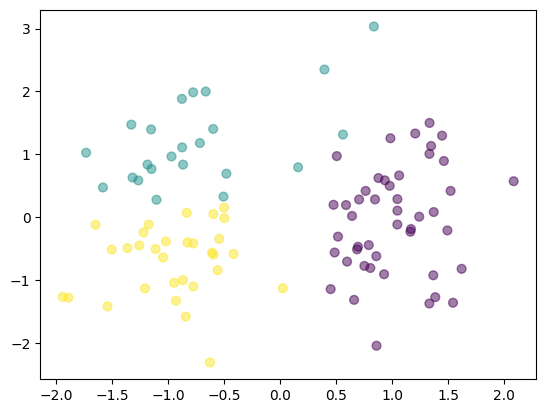

In [18]:
plt.scatter(X[:,0], X[:,1], s=40, c=model.labels_, alpha=0.5)
plt.show()

In [19]:
from sklearn.metrics import adjusted_mutual_info_score

In [21]:
model = KMeans(n_clusters=3).fit(X)
score = adjusted_mutual_info_score(y, model.labels_, average_method="arithmetic")
print(f"AMI: {score:.3f}")

AMI: 0.610
